<a href="https://colab.research.google.com/github/shivanggarg1998/Suggestion-Mining/blob/master/RnnWord2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.chdir('/content/drive/My Drive/Suggestion-Mining2/master')

In [2]:
!git clone https://github.com/shubhamk0027/Suggestion-Mining master

Cloning into 'master'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 97 (delta 17), reused 30 (delta 8), pack-reused 49
Unpacking objects: 100% (97/97), done.
Checking out files: 100% (24/24), done.


In [0]:
# FOR PLOTTING GRAPHS
import matplotlib.pyplot as plt

# LIBRARIES FOR THE RNN CLASSIFIER
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer

# FOR EVALUATION METRICS OF THE PREDICTIONS
from sklearn.metrics import accuracy_score,f1_score

In [0]:
import pickle

variables = pickle.load(open('./Data/variables','rb'))

test_sequence  = variables['test_sequence']
valid_sequence  = variables['valid_sequence']
train_sequence  = variables['train_sequence']

y_train  = variables['y_train']
y_test  = variables['y_test']
y_valid  = variables['y_valid']

MXSEQLEN  = variables['MXSEQLEN']
EMBEDDING_DIM  = variables['EMBEDDING_DIM']
train_embedding_weights  = variables['train_embedding_weights']
train_word_index  = variables['train_word_index']

In [0]:
def RNN(embedding_weights,num_words):
    
    # THE INPUT LAYER
    sequence_input      =   Input(shape=(MXSEQLEN,), dtype='int32')
    
    # THE EMBEDDING LAYER OF EMBEDDING_WEIGHTS     
    embedding_layer = Embedding(
        num_words,                  # VOCABULARY SIZE
        EMBEDDING_DIM,              # ONE HOT ENCODING VECTOR SIZE
        weights=[embedding_weights],# EMBEGGING WEIGHTS FROM THE GOOGLE NEW WORD VECTOR
        input_length=MXSEQLEN,      # MAX LENGTH OF A SEQUENCE
        trainable=False             # PARAMETERS WILL NOT BE TRAINED
    )
    
    # THE EMBEDDING SEQUENCES FROM THE EMBEDDING LAYER 
    embedded_sequences  =   embedding_layer(sequence_input)

    # ADDING ONE LSTM LAYER OF 256 NODES
    lstm_layer = LSTM(256)(embedded_sequences)                    
    
    # DENSE NEURON LAYER
    next_layer = Dense(128, activation='relu')(lstm_layer)        
    
    # FEW DROPOUTS FOR AVOIDING OVERFIT
    next_layer = Dropout(0.5)(next_layer)                         

    next_layer = Dense(128, activation='relu')(next_layer)        

    # FINAL DENSE LAYER
    preds = Dense(1, activation='sigmoid')(next_layer)  

    model = Model(sequence_input, preds)
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['acc']
    )
    
    model.summary()
    return model

In [11]:
rnn_model = RNN(train_embedding_weights, len(train_word_index)+1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 80, 300)           1145700   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               570368    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129   

In [12]:
EPOCHS = 5
BATCH_SIZE = 50

history = rnn_model.fit(
    train_sequence,       # THE INPUT SEQUENCES TO THE MODEL
    y_train,              # TARGET OUTPUT
    epochs=EPOCHS,    
    validation_data=(valid_sequence, y_valid), 
    shuffle=True, 
    batch_size=BATCH_SIZE
)

Epoch 1/5
170/170 [==============================] - 74s 433ms/step - loss: 0.4921 - acc: 0.7811 - val_loss: 0.2900 - val_acc: 0.9016
Epoch 2/5
170/170 [==============================] - 74s 434ms/step - loss: 0.3610 - acc: 0.8469 - val_loss: 0.2433 - val_acc: 0.8968
Epoch 3/5
170/170 [==============================] - 74s 434ms/step - loss: 0.3249 - acc: 0.8634 - val_loss: 0.2252 - val_acc: 0.9028
Epoch 4/5
170/170 [==============================] - 74s 437ms/step - loss: 0.3032 - acc: 0.8713 - val_loss: 0.2149 - val_acc: 0.9148
Epoch 5/5
170/170 [==============================] - 74s 435ms/step - loss: 0.2867 - acc: 0.8768 - val_loss: 0.1989 - val_acc: 0.9220


In [0]:

#####################################################################################
########################## ANALYZING AND TWEAKING THE MODEL##########################
#####################################################################################

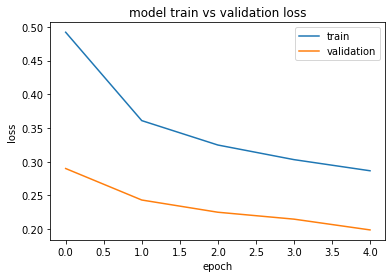

In [13]:
# TRAINING VS VALIDATION LOSS GRAPH
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
predict=rnn_model.predict(test_sequence)
predict=[int(x+0.5) for x in predict]

In [15]:
# EVLUATING THE ACCURACY
accuracy = accuracy_score(y_test, predict)
f1=f1_score(y_test,predict)
print("F1 Score: %.2f%%" % (f1* 100.0))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

F1 Score: 76.57%
Accuracy: 82.94%
